In [52]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [95]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 10676128

# Apply the random seed to numpy.
np.random.seed(RANDOM_SEED)

In [96]:
'''
Columns are:
1. Average Rating (the arithmetic mean of all individual quality ratings of this professor)
2. Average Difficulty (the arithmetic mean of all individual difficulty ratings of this professor)
3. Number of ratings (simply the total number of ratings these averages are based on)
4. Received a “pepper”? (Boolean - was this professor judged as “hot” by the students?)
5. The proportion of students that said they would take the class again
6. The number of ratings coming from online classes
7. Male gender (Boolean – 1: determined with high confidence that professor is male)
8. Female (Boolean – 1: determined with high confidence that professor is female)
'''
df_capstone = pd.read_csv('./rmpCapstoneNum.csv', header=None)
df_capstone.columns = ['Average Rating', 'Average Difficulty', 'NumberOfRatings', 'Received a pepper', 
                       'Proportion of students that said they would take the class again', 
                       'Number of ratings coming from online classes', 'HighConfMale', 'HighConfFemale']


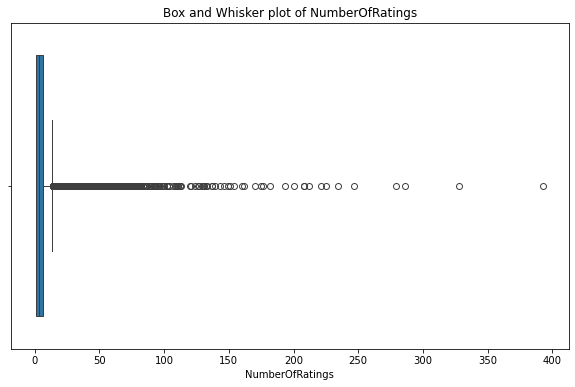

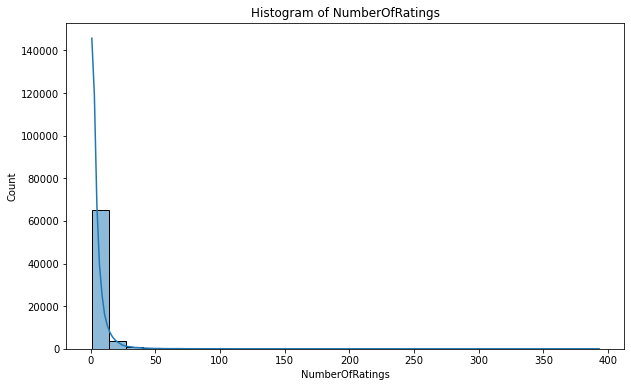

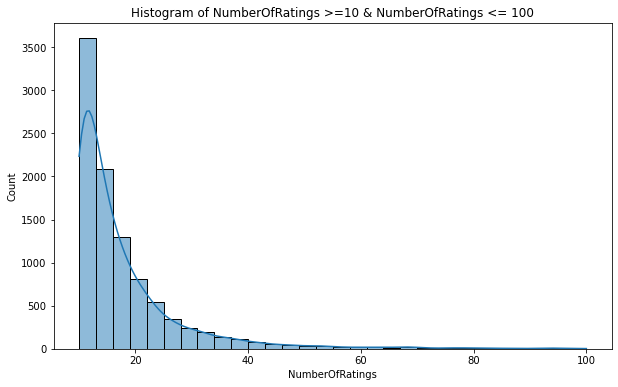

In [55]:
# Plot NumberOfRatings as a box and whisker plot
plt.figure(figsize=(10, 6))

sns.boxplot(x='NumberOfRatings', data=df_capstone)

plt.title('Box and Whisker plot of NumberOfRatings')

plt.show()
# Plot NumberOfRatings as a histogram
plt.figure(figsize=(10, 6))

sns.histplot(df_capstone['NumberOfRatings'], bins=30, kde=True)

plt.title('Histogram of NumberOfRatings')

plt.show()

# Plot NumberOfRatings >=10 as a histogram
plt.figure(figsize=(10, 6))

sns.histplot(df_capstone[(df_capstone['NumberOfRatings'] >= 10) & (df_capstone['NumberOfRatings'] <= 100)]['NumberOfRatings'], bins=30, kde=True)

plt.title('Histogram of NumberOfRatings >=10 & NumberOfRatings <= 100')

plt.show()

In [56]:
# Number of professors with less than 10 ratings vs more than 10 ratings
print('Number of professors with less than 10 ratings: ', len(df_capstone[df_capstone['NumberOfRatings'] < 10]))
print('Number of professors with more than 10 ratings: ', len(df_capstone[df_capstone['NumberOfRatings'] >= 10]))
# Number of those profressors with more than 10 ratings that are male
print('Number of professors with more than 10 ratings that are male: ', len(df_capstone[(df_capstone['NumberOfRatings'] >= 10) & (df_capstone['HighConfMale'] == 1)]))
print('Number of professors with more than 10 ratings that are female: ', len(df_capstone[(df_capstone['NumberOfRatings'] >= 10) & (df_capstone['HighConfFemale'] == 1)]))
# Proportion of men and women with more than 10 ratings
men_more_than_10 = len(df_capstone[(df_capstone['NumberOfRatings'] >= 10) & (df_capstone['HighConfMale'] == 1)])
women_more_than_10 = len(df_capstone[(df_capstone['NumberOfRatings'] >= 10) & (df_capstone['HighConfFemale'] == 1)])

total_men = len(df_capstone[df_capstone['HighConfMale'] == 1])
total_women = len(df_capstone[df_capstone['HighConfFemale'] == 1])

proportion_men_more_than_10 = men_more_than_10 / (men_more_than_10 + women_more_than_10) if total_men > 0 else 0
proportion_women_more_than_10 = women_more_than_10 / (men_more_than_10 + women_more_than_10) if total_women > 0 else 0

print('Proportion of men with more than 10 ratings: ', proportion_men_more_than_10)
print('Proportion of women with more than 10 ratings: ', proportion_women_more_than_10)

Number of professors with less than 10 ratings:  60163
Number of professors with more than 10 ratings:  9841
Number of professors with more than 10 ratings that are male:  4288
Number of professors with more than 10 ratings that are female:  3419
Proportion of men with more than 10 ratings:  0.5563773193200986
Proportion of women with more than 10 ratings:  0.4436226806799014


In [57]:
df_capstone_greater_than_10 = df_capstone[(df_capstone['NumberOfRatings'] >= 10) & ~((df_capstone['HighConfMale'] == 1) & (df_capstone['HighConfFemale'] == 1)) & ~((df_capstone['HighConfMale'] == 0) & (df_capstone['HighConfFemale'] == 0))]
df_capstone_greater_than_10_men = df_capstone_greater_than_10[df_capstone_greater_than_10['HighConfMale'] == 1]
df_capstone_greater_than_10_female = df_capstone_greater_than_10[df_capstone_greater_than_10['HighConfFemale'] == 1]

In [58]:
df_capstone_greater_than_10.shape

(7105, 8)

In [59]:
print(df_capstone_greater_than_10.isna().sum())


AverageProfessorRating                                                 0
Average Difficulty                                                     0
NumberOfRatings                                                        0
Received a pepper                                                      0
Proportion of students that said they would take the class again    1142
Number Of Ratings coming from online classes                           0
HighConfMale                                                           0
HighConfFemale                                                         0
dtype: int64


In [60]:
df_capstone_greater_than_10.head()

,AverageProfessorRating,Average Difficulty,NumberOfRatings,Received a pepper,Proportion of students that said they would take the class again,Number Of Ratings coming from online classes,HighConfMale,HighConfFemale
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0
25,4.3,3.3,16.0,1.0,83.0,0.0,0,1
39,3.5,3.2,20.0,1.0,NaN,0.0,1,0
40,1.8,3.8,15.0,0.0,22.0,1.0,0,1


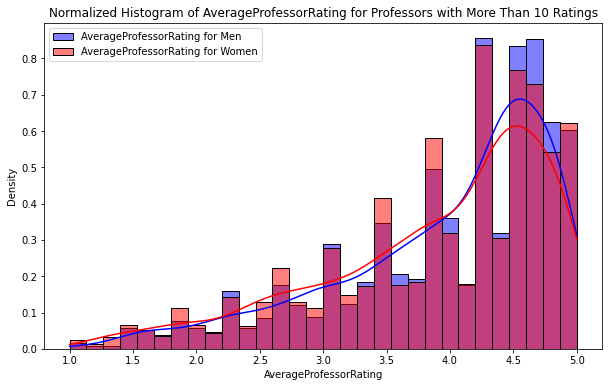

In [61]:
# Plot the histogram of the AverageProfessorRating for professors with more than 10 ratings for women and men separately
plt.figure(figsize=(10, 6))

sns.histplot(df_capstone_greater_than_10_men['AverageProfessorRating'], bins=30, kde=True, color='blue', label='AverageProfessorRating for Men', stat='density')
sns.histplot(df_capstone_greater_than_10_female['AverageProfessorRating'], bins=30, kde=True, color='red', label='AverageProfessorRating for Women', stat='density')

plt.title('Normalized Histogram of AverageProfessorRating for Professors with More Than 10 Ratings')
plt.xlabel('AverageProfessorRating')
plt.ylabel('Density')
plt.legend()
plt.show()

Hypothesis Testing: Conducting a KS Test and mannwhitneyu for Male and Female Professors with more than ratings

1. KS Test and the Mann-Whitney U Test both report a significant difference between the ratings of men and women with greater than 10 ratings. 

In [62]:
# Perform a KS test to check if the distributions of AverageProfessorRating for Male and Felame professors with more than 10 ratings are the same
ks_stat, p_val = stats.ks_2samp(df_capstone_greater_than_10_men['AverageProfessorRating'], df_capstone_greater_than_10_female['AverageProfessorRating'])
mannwhitney_stat, mannwhitney_p_val = stats.mannwhitneyu(df_capstone_greater_than_10_men['AverageProfessorRating'], df_capstone_greater_than_10_female['AverageProfessorRating'])

print('KS Statistic: ', ks_stat)
print('P-value: ', p_val)
print('Mann Whitney U Statistic: ', mannwhitney_stat)
print('Mann Whitney U P-value: ', mannwhitney_p_val)

KS Statistic:  0.04324003299369519
P-value:  0.0027717214563375667
Mann Whitney U Statistic:  6505115.5
Mann Whitney U P-value:  0.000730472941426043


## Adjusting for confounds: 

1. Pepper Confound
2. Years of Experience Confound: Using the number of ratings as a proxy for years of experience.

First we check if Pepper is a Confound.

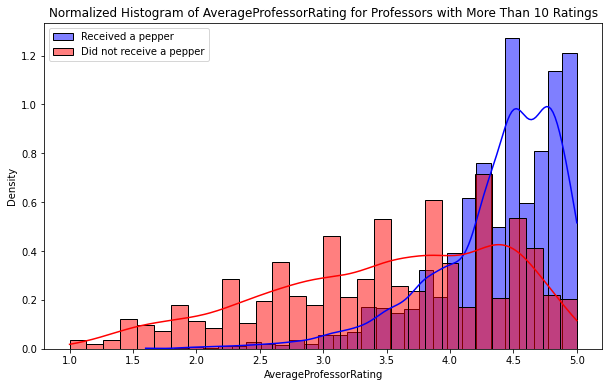

Median rating of professors with more than 10 ratings who received a pepper:  4.5 Median rating of professors with more than 10 ratings who did not receive a pepper:  3.6


In [63]:
# Plot the normalized histogram of the AverageProfessorRating for professors with more than 10 ratings who received a pepper and those who did not
plt.figure(figsize=(10, 6))
sns.histplot(df_capstone_greater_than_10[df_capstone_greater_than_10['Received a pepper'] == 1]['AverageProfessorRating'], bins=30, kde=True, color='blue', label='Received a pepper', stat='density')
sns.histplot(df_capstone_greater_than_10[df_capstone_greater_than_10['Received a pepper'] == 0]['AverageProfessorRating'], bins=30, kde=True, color='red', label='Did not receive a pepper', stat='density')
plt.title('Normalized Histogram of AverageProfessorRating for Professors with More Than 10 Ratings')
plt.xlabel('AverageProfessorRating')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the median rating of professors with more than 10 ratings who received a pepper and those who did not
median_rating_pepper = df_capstone_greater_than_10[df_capstone_greater_than_10['Received a pepper'] == 1]['AverageProfessorRating'].median()
median_rating_no_pepper = df_capstone_greater_than_10[df_capstone_greater_than_10['Received a pepper'] == 0]['AverageProfessorRating'].median()

print('Median rating of professors with more than 10 ratings who received a pepper: ', median_rating_pepper, 'Median rating of professors with more than 10 ratings who did not receive a pepper: ', median_rating_no_pepper)

In [98]:
# Check the correlation between AverageProfessorRating and pepper
# Conduct a biserial correlation test

corr_pepper, p_val_pepper = stats.pointbiserialr(df_capstone_greater_than_10['AverageProfessorRating'], df_capstone_greater_than_10['Received a pepper'])
print('Correlation between AverageProfessorRating and pepper: ', corr_pepper)

Correlation between AverageProfessorRating and pepper:  0.5071572248403043


Hypothesis Testing: Conducting a KS Test for professors with more than 10 ratings who received a pepper rating and those who did not.

1. KS Test reports a significant difference between the ratings of professors who received a pepper rating and those who did not.
2. It does not make sense to conduct a Mann-Whitney U Test because the distribution of ratings for professors who received a pepper rating is vastly different from those who did not.

In [65]:
# Conduct a KS test to check if the distributions of AverageProfessorRating for professors with more than 10 ratings who received a pepper and those who did not are the same
ks_stat, p_val = stats.ks_2samp(df_capstone_greater_than_10[df_capstone_greater_than_10['Received a pepper'] == 1]['AverageProfessorRating'], df_capstone_greater_than_10[df_capstone_greater_than_10['Received a pepper'] == 0]['AverageProfessorRating'])

print('KS Statistic: ', ks_stat)
print('P-value: ', p_val)

KS Statistic:  0.4542801411492915
P-value:  2.4e-322


Now lets check if Years of Experience is a Confound.
1. We will create three groups of professors based on the number of ratings they have received: 10-12, 13-18, 19+, These three groups allow us to have a similar number of professors in each group.


In [66]:
print(len(df_capstone_greater_than_10[(df_capstone_greater_than_10['NumberOfRatings'] >= 10) & (df_capstone_greater_than_10['NumberOfRatings'] <= 12)]))
print(len(df_capstone_greater_than_10[(df_capstone_greater_than_10['NumberOfRatings'] >= 13) & (df_capstone_greater_than_10['NumberOfRatings'] <= 18)]))
print(len(df_capstone_greater_than_10[(df_capstone_greater_than_10['NumberOfRatings'] > 18)]))

df_capstone_10_to_12 = df_capstone_greater_than_10[(df_capstone_greater_than_10['NumberOfRatings'] >= 10) & (df_capstone_greater_than_10['NumberOfRatings'] <= 12)]
df_capstone_13_to_18 = df_capstone_greater_than_10[(df_capstone_greater_than_10['NumberOfRatings'] >= 13) & (df_capstone_greater_than_10['NumberOfRatings'] <= 18)]
df_capstone_19_plus = df_capstone_greater_than_10[(df_capstone_greater_than_10['NumberOfRatings'] > 18)]


2616
2441
2048


In [94]:
corr_ratings = df_capstone_greater_than_10['AverageProfessorRating'].corr(df_capstone_greater_than_10['NumberOfRatings'])
print('Correlation between AverageProfessorRating and NumberOfRatings: ', corr_ratings)


Correlation between AverageProfessorRating and NumberOfRatings:  0.05454242821782137


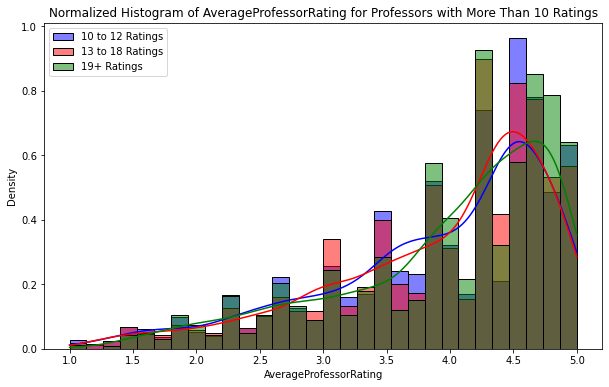

In [68]:
# Plot the normalized histogram of the three groups AverageProfessorRating
plt.figure(figsize=(10, 6))
sns.histplot(df_capstone_10_to_12['AverageProfessorRating'], bins=30, kde=True, color='blue', label='10 to 12 Ratings', stat='density')
sns.histplot(df_capstone_13_to_18['AverageProfessorRating'], bins=30, kde=True, color='red', label='13 to 18 Ratings', stat='density')
sns.histplot(df_capstone_19_plus['AverageProfessorRating'], bins=30, kde=True, color='green', label='19+ Ratings', stat='density')
plt.title('Normalized Histogram of AverageProfessorRating for Professors with More Than 10 Ratings')
plt.xlabel('AverageProfessorRating')
plt.ylabel('Density')
plt.legend()
plt.show()

Hyphothesis Testing: Conducting a KS Test for professors with more than 10 ratings who have received 10-12, 13-18, 19+ ratings.
1. Kruskal-Wallis H Test reports a significant difference between the ratings of professors who have received 10-12, 13-18, 19+ ratings.
2. We then conduct a KS Test for each pair of groups to determine which groups are significantly different from each other.
3. We find that the ratings of professors who have received 10-12 and 13-18 ratings are significantly different from those who have received 19+ ratings. However, the ratings of professors who have received 10-12 and 13-18 ratings are not significantly different from each other.

In [69]:
# Conduct a Kruskal Wallis test to check if the distributions of AverageProfessorRating for the three groups are the same
kruskal_stat, kruskal_p_val = stats.kruskal(df_capstone_10_to_12['AverageProfessorRating'], df_capstone_13_to_18['AverageProfessorRating'], df_capstone_19_plus['AverageProfessorRating'])

print('Kruskal Wallis Statistic: ', kruskal_stat)
print('P-value: ', kruskal_p_val)

Kruskal Wallis Statistic:  11.456791653826576
P-value:  0.003252290287721847


In [70]:
# Conduct a KS test to check if the distributions of AverageProfessorRating for the three groups are the same
ks_stat_10_to_12_vs_13_to_18, p_val_10_to_12_vs_13_to_18 = stats.ks_2samp(df_capstone_10_to_12['AverageProfessorRating'], df_capstone_13_to_18['AverageProfessorRating'])
ks_stat_10_to_12_vs_19_plus, p_val_10_to_12_vs_19_plus = stats.ks_2samp(df_capstone_10_to_12['AverageProfessorRating'], df_capstone_19_plus['AverageProfessorRating'])
ks_stat_13_to_18_vs_19_plus, p_val_13_to_18_vs_19_plus = stats.ks_2samp(df_capstone_13_to_18['AverageProfessorRating'], df_capstone_19_plus['AverageProfessorRating'])

print('KS Statistic 10 to 12 vs 13 to 18: ', ks_stat_10_to_12_vs_13_to_18)
print('P-value 10 to 12 vs 13 to 18: ', p_val_10_to_12_vs_13_to_18)
print('KS Statistic 10 to 12 vs 19 plus: ', ks_stat_10_to_12_vs_19_plus)
print('P-value 10 to 12 vs 19 plus: ', p_val_10_to_12_vs_19_plus)
print('KS Statistic 13 to 18 vs 19 plus: ', ks_stat_13_to_18_vs_19_plus)
print('P-value 13 to 18 vs 19 plus: ', p_val_13_to_18_vs_19_plus)

KS Statistic 10 to 12 vs 13 to 18:  0.02658943732640781
P-value 10 to 12 vs 13 to 18:  0.3260162135908709
KS Statistic 10 to 12 vs 19 plus:  0.06455317039373089
P-value 10 to 12 vs 19 plus:  0.00013091278816487642
KS Statistic 13 to 18 vs 19 plus:  0.0625248041274068
P-value 13 to 18 vs 19 plus:  0.00031187083148937167


In [71]:
# Concuct a Mann Whitney U test to check if the distributions of AverageProfessorRating for the 10_to_12 and 13_to_18 groups are the same
mannwhitney_stat, mannwhitney_p_val = stats.mannwhitneyu(df_capstone_10_to_12['AverageProfessorRating'], df_capstone_13_to_18['AverageProfessorRating'])

print('Mann Whitney U Statistic: ', mannwhitney_stat)
print('Mann Whitney U P-value: ', mannwhitney_p_val)

# Concuct a Mann Whitney U test to check if the distributions of AverageProfessorRating for the 10_to_12 and 19_plus groups are the same
mannwhitney_stat, mannwhitney_p_val = stats.mannwhitneyu(df_capstone_10_to_12['AverageProfessorRating'], df_capstone_19_plus['AverageProfessorRating'])

print('Mann Whitney U Statistic: ', mannwhitney_stat)
print('Mann Whitney U P-value: ', mannwhitney_p_val)

# Concuct a Mann Whitney U test to check if the distributions of AverageProfessorRating for the 13_to_18 and 19_plus groups are the same
mannwhitney_stat, mannwhitney_p_val = stats.mannwhitneyu(df_capstone_13_to_18['AverageProfessorRating'], df_capstone_19_plus['AverageProfessorRating'])

print('Mann Whitney U Statistic: ', mannwhitney_stat)
print('Mann Whitney U P-value: ', mannwhitney_p_val)

Mann Whitney U Statistic:  3165085.0
Mann Whitney U P-value:  0.5922321725680834
Mann Whitney U Statistic:  2530743.0
Mann Whitney U P-value:  0.0011589781783453727
Mann Whitney U Statistic:  2386599.5
Mann Whitney U P-value:  0.0088894813197419


Lets combine the group 10 to 12 and 13 to 18 and compare it to the group 19+. Since 10 to 12 and 13 to 18 have similar distributions. 

In [91]:
df_capstone_10_to_18 = df_capstone_greater_than_10[(df_capstone_greater_than_10['NumberOfRatings'] >= 10) & (df_capstone_greater_than_10['NumberOfRatings'] <= 18)]

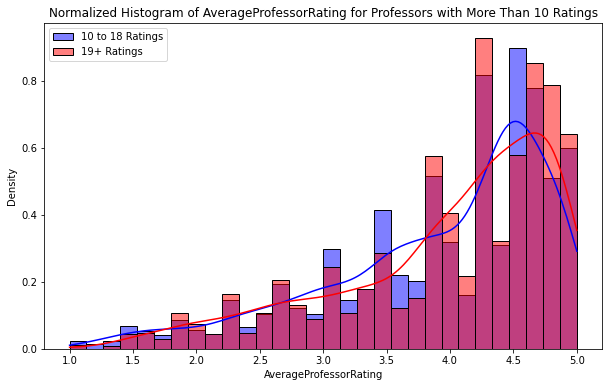

In [73]:
# Plot the normalized histogram of AverageProfessorRating for professors with 10 to 18 ratings and those with more than 18 ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_capstone_10_to_18['AverageProfessorRating'], bins=30, kde=True, color='blue', label='10 to 18 Ratings', stat='density')
sns.histplot(df_capstone_19_plus['AverageProfessorRating'], bins=30, kde=True, color='red', label='19+ Ratings', stat='density')
plt.title('Normalized Histogram of AverageProfessorRating for Professors with More Than 10 Ratings')
plt.xlabel('AverageProfessorRating')
plt.ylabel('Density')
plt.legend()
plt.show()

Hyphothesis Testing: Conducting a KS Test for professors who have received 10-18 and 19+ ratings.
1. KS Test reports a significant difference between the ratings of professors who have received 10-18 and 19+ ratings. 
2. The distribution of ratings for professors who have received 10-18 ratings is significantly different from those who have received 19+ ratings therefore we can conclude that years of experience is a confound and mannwhitneyu test is not valid.

In [74]:
# Conduct a KS test to check if the distributions of AverageProfessorRating for professors with 10 to 18 ratings and those with more than 18 ratings are the same
ks_stat, p_val = stats.ks_2samp(df_capstone_10_to_18['AverageProfessorRating'], df_capstone_19_plus['AverageProfessorRating'])

# Conduct a Mann Whitney U test to check if the distributions of AverageProfessorRating for professors with 10 to 18 ratings and those with more than 18 ratings are the same
mannwhitney_stat, mannwhitney_p_val = stats.mannwhitneyu(df_capstone_10_to_18['AverageProfessorRating'], df_capstone_19_plus['AverageProfessorRating'])

print('KS Statistic: ', ks_stat)
print('P-value: ', p_val)
print('Mann Whitney U Statistic: ', mannwhitney_stat)
print('Mann Whitney U P-value: ', mannwhitney_p_val)

KS Statistic:  0.06118027919220882
P-value:  3.4489834625710634e-05
Mann Whitney U Statistic:  4917342.5
Mann Whitney U P-value:  0.0008434167563334488


## We adjust for the confounds pepper and years of experience
1. We first divide the professors into 4 groups based on the number of ratings they have received and whether they have received a pepper rating.

In [75]:
df_capstone_10_to_18_pepper = df_capstone_10_to_18[df_capstone_10_to_18['Received a pepper'] == 1]
df_capstone_10_to_18_no_pepper = df_capstone_10_to_18[df_capstone_10_to_18['Received a pepper'] == 0]
df_capstone_19_plus_pepper = df_capstone_19_plus[df_capstone_19_plus['Received a pepper'] == 1]
df_capstone_19_plus_no_pepper = df_capstone_19_plus[df_capstone_19_plus['Received a pepper'] == 0]

Lets further divide the groups into male and female professors

In [76]:
# Pepper
df_capstone_10_to_18_pepper_male = df_capstone_10_to_18_pepper[df_capstone_10_to_18_pepper['HighConfMale'] == 1]
df_capstone_10_to_18_pepper_female = df_capstone_10_to_18_pepper[df_capstone_10_to_18_pepper['HighConfFemale'] == 1]
df_capstone_19_plus_pepper_male = df_capstone_19_plus_pepper[df_capstone_19_plus_pepper['HighConfMale'] == 1]
df_capstone_19_plus_pepper_female = df_capstone_19_plus_pepper[df_capstone_19_plus_pepper['HighConfFemale'] == 1]

# No Pepper
df_capstone_10_to_18_no_pepper_male = df_capstone_10_to_18_no_pepper[df_capstone_10_to_18_no_pepper['HighConfMale'] == 1]
df_capstone_10_to_18_no_pepper_female = df_capstone_10_to_18_no_pepper[df_capstone_10_to_18_no_pepper['HighConfFemale'] == 1]
df_capstone_19_plus_no_pepper_male = df_capstone_19_plus_no_pepper[df_capstone_19_plus_no_pepper['HighConfMale'] == 1]
df_capstone_19_plus_no_pepper_female = df_capstone_19_plus_no_pepper[df_capstone_19_plus_no_pepper['HighConfFemale'] == 1]


In [77]:
print(' Size of df_capstone_10_to_18_pepper_male: ', len(df_capstone_10_to_18_pepper_male))
print(' Size of df_capstone_10_to_18_pepper_female: ', len(df_capstone_10_to_18_pepper_female))
print(' Size of df_capstone_19_plus_pepper_male: ', len(df_capstone_19_plus_pepper_male))
print(' Size of df_capstone_19_plus_pepper_female: ', len(df_capstone_19_plus_pepper_female))
print(' Size of df_capstone_10_to_18_no_pepper_male: ', len(df_capstone_10_to_18_no_pepper_male))
print(' Size of df_capstone_10_to_18_no_pepper_female: ', len(df_capstone_10_to_18_no_pepper_female))
print(' Size of df_capstone_19_plus_no_pepper_male: ', len(df_capstone_19_plus_no_pepper_male))
print(' Size of df_capstone_19_plus_no_pepper_female: ', len(df_capstone_19_plus_no_pepper_female))

 Size of df_capstone_10_to_18_pepper_male:  1247
 Size of df_capstone_10_to_18_pepper_female:  1107
 Size of df_capstone_19_plus_pepper_male:  676
 Size of df_capstone_19_plus_pepper_female:  483
 Size of df_capstone_10_to_18_no_pepper_male:  1521
 Size of df_capstone_10_to_18_no_pepper_female:  1182
 Size of df_capstone_19_plus_no_pepper_male:  543
 Size of df_capstone_19_plus_no_pepper_female:  346


In [78]:
# Conduct KS tests for the 8 groups comparing male and female
ks_stat_10_to_18_pepper, p_val_10_to_18_pepper = stats.ks_2samp(df_capstone_10_to_18_pepper_male['AverageProfessorRating'], df_capstone_10_to_18_pepper_female['AverageProfessorRating'])
ks_stat_10_to_18_no_pepper, p_val_10_to_18_no_pepper = stats.ks_2samp(df_capstone_10_to_18_no_pepper_male['AverageProfessorRating'], df_capstone_10_to_18_no_pepper_female['AverageProfessorRating'])
ks_stat_19_plus_pepper, p_val_19_plus_pepper = stats.ks_2samp(df_capstone_19_plus_pepper_male['AverageProfessorRating'], df_capstone_19_plus_pepper_female['AverageProfessorRating'])
ks_stat_19_plus_no_pepper, p_val_19_plus_no_pepper = stats.ks_2samp(df_capstone_19_plus_no_pepper_male['AverageProfessorRating'], df_capstone_19_plus_no_pepper_female['AverageProfessorRating'])

print('P-value 10 to 18 Pepper: ', p_val_10_to_18_pepper)
print('P-value 10 to 18 No Pepper: ', p_val_10_to_18_no_pepper)
print('P-value 19 Plus Pepper: ', p_val_19_plus_pepper)
print('P-value 19 Plus No Pepper: ', p_val_19_plus_no_pepper)

P-value 10 to 18 Pepper:  0.016782490078207684
P-value 10 to 18 No Pepper:  0.03605261328374842
P-value 19 Plus Pepper:  0.7030776304365008
P-value 19 Plus No Pepper:  0.0003367327345554695


In [79]:
# Conduct Mann Whitney U tests for the 8 groups comparing male and female
mannwhitney_stat_10_to_18_pepper, mannwhitney_p_val_10_to_18_pepper = stats.mannwhitneyu(df_capstone_10_to_18_pepper_male['AverageProfessorRating'], df_capstone_10_to_18_pepper_female['AverageProfessorRating'])
mannwhitney_stat_19_plus_pepper, mannwhitney_p_val_19_plus_pepper = stats.mannwhitneyu(df_capstone_19_plus_pepper_male['AverageProfessorRating'], df_capstone_19_plus_pepper_female['AverageProfessorRating'])
mannwhitney_stat_10_to_18_no_pepper, mannwhitney_p_val_10_to_18_no_pepper = stats.mannwhitneyu(df_capstone_10_to_18_no_pepper_male['AverageProfessorRating'], df_capstone_10_to_18_no_pepper_female['AverageProfessorRating'])
mannwhitney_stat_19_plus_no_pepper, mannwhitney_p_val_19_plus_no_pepper = stats.mannwhitneyu(df_capstone_19_plus_no_pepper_male['AverageProfessorRating'], df_capstone_19_plus_no_pepper_female['AverageProfessorRating'])

print('Mann Whitney U P-value 10 to 18 Pepper: ', mannwhitney_p_val_10_to_18_pepper)
print('Mann Whitney U P-value 19 plus Pepper: ', mannwhitney_p_val_19_plus_pepper)
print('Mann Whitney U P-value 10 to 18 No Pepper: ', mannwhitney_p_val_10_to_18_no_pepper)
print('Mann Whitney U P-value 19 plus No Pepper: ', mannwhitney_p_val_19_plus_no_pepper)


Mann Whitney U P-value 10 to 18 Pepper:  0.005801938865851229
Mann Whitney U P-value 19 plus Pepper:  0.1869651786233344
Mann Whitney U P-value 10 to 18 No Pepper:  0.00567340577324256
Mann Whitney U P-value 19 plus No Pepper:  3.884537807476582e-05


We check the 19 plus no pepper group since it is the only one significantly different from the other groups.

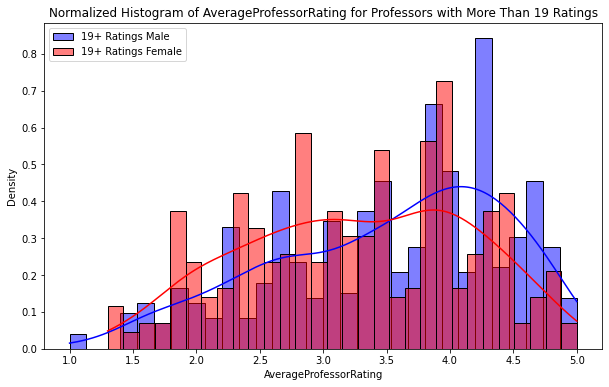

In [80]:
# Plot the normalized distributions of the 19 plus no pepper group male and female
plt.figure(figsize=(10, 6))
sns.histplot(df_capstone_19_plus_no_pepper_male['AverageProfessorRating'], bins=30, kde=True, color='blue', label='19+ Ratings Male', stat='density')
sns.histplot(df_capstone_19_plus_no_pepper_female['AverageProfessorRating'], bins=30, kde=True, color='red', label='19+ Ratings Female', stat='density')
plt.title('Normalized Histogram of AverageProfessorRating for Professors with More Than 19 Ratings')
plt.xlabel('AverageProfessorRating')
plt.ylabel('Density')
plt.legend()
plt.show()

Confidence Interval: Conducting a 95% confidence interval for the sample means of male and female professors with more than 19 ratings and no pepper rating.

95% Confidence Interval for Male Professors: [3.432910252003368, 3.5866109266338313]


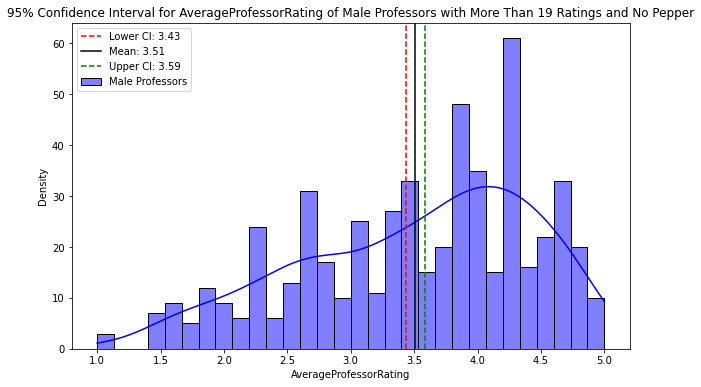

In [81]:
# Calculate the 95% confidence interval for the sample means of male and female professors with more than 19 ratings and no pepper rating
mean_male = df_capstone_19_plus_no_pepper_male['AverageProfessorRating'].mean()
std_male = df_capstone_19_plus_no_pepper_male['AverageProfessorRating'].std()
n_male = len(df_capstone_19_plus_no_pepper_male['AverageProfessorRating'])

ci_lower_male = mean_male - 1.96 * (std_male / np.sqrt(n_male))
ci_upper_male = mean_male + 1.96 * (std_male / np.sqrt(n_male))

print(f'95% Confidence Interval for Male Professors: [{ci_lower_male}, {ci_upper_male}]')

# Plot the 95% confidence interval
plt.figure(figsize=(10, 6))
sns.histplot(df_capstone_19_plus_no_pepper_male['AverageProfessorRating'], bins=30, kde=True, color='blue', label='Male Professors')
plt.axvline(ci_lower_male, color='red', linestyle='--', label=f'Lower CI: {ci_lower_male:.2f}')
plt.axvline(df_capstone_19_plus_no_pepper_male['AverageProfessorRating'].mean(), color='black', linestyle='-', label=f'Mean: {df_capstone_19_plus_no_pepper_male["AverageProfessorRating"].mean():.2f}')
plt.axvline(ci_upper_male, color='green', linestyle='--', label=f'Upper CI: {ci_upper_male:.2f}')
plt.title('95% Confidence Interval for AverageProfessorRating of Male Professors with More Than 19 Ratings and No Pepper')
plt.xlabel('AverageProfessorRating')
plt.ylabel('Density')
plt.legend()
plt.show()


95% Confidence Interval for Female Professors: [3.1722234141533874, 3.3647708054997927]


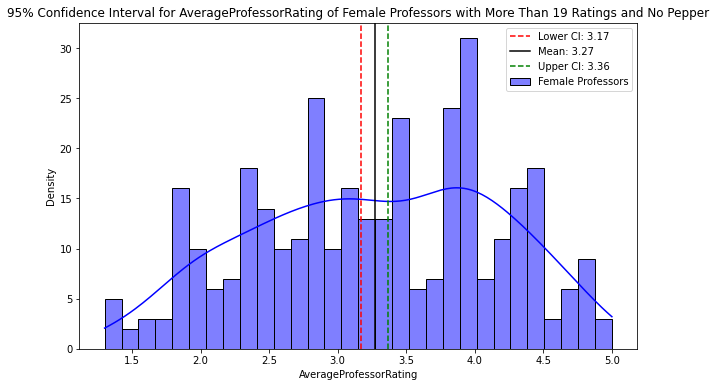

In [ ]:
# Calculate the 95% confidence interval for the sample means of male and female professors with more than 19 ratings and no pepper rating
mean_female = df_capstone_19_plus_no_pepper_female['AverageProfessorRating'].mean()
std_female = df_capstone_19_plus_no_pepper_female['AverageProfessorRating'].std()
n_female = len(df_capstone_19_plus_no_pepper_female['AverageProfessorRating'])

ci_lower_female = mean_female - 1.96 * (std_female / np.sqrt(n_female))
ci_upper_female = mean_female + 1.96 * (std_female / np.sqrt(n_female))

print(f'95% Confidence Interval for Female Professors: [{ci_lower_female}, {ci_upper_female}]')

# Plot the 95% confidence interval
plt.figure(figsize=(10, 6))
sns.histplot(df_capstone_19_plus_no_pepper_female['AverageProfessorRating'], bins=30, kde=True, color='blue', label='Female Professors')
plt.axvline(ci_lower_female, color='red', linestyle='--', label=f'Lower CI: {ci_lower_female:.2f}')
plt.axvline(df_capstone_19_plus_no_pepper_female['AverageProfessorRating'].mean(), color='black', linestyle='-', label=f'Mean: {df_capstone_19_plus_no_pepper_female["AverageProfessorRating"].mean():.2f}')
plt.axvline(ci_upper_female, color='green', linestyle='--', label=f'Upper CI: {ci_upper_female:.2f}')
plt.title('95% Confidence Interval for AverageProfessorRating of Female Professors with More Than 19 Ratings and No Pepper')
plt.xlabel('AverageProfessorRating')
plt.ylabel('Density')
plt.legend()
plt.show()


Lets check the effect size of the difference

In [83]:
mean_diff = df_capstone_19_plus_no_pepper_male['AverageProfessorRating'].mean() - df_capstone_19_plus_no_pepper_female['AverageProfessorRating'].mean()

pooledd_std = np.sqrt((df_capstone_19_plus_no_pepper_male['AverageProfessorRating'].std()**2 + df_capstone_19_plus_no_pepper_female['AverageProfessorRating'].std()**2) / 2)

effect_size = mean_diff / pooledd_std

print('Effect Size: ', effect_size)

Effect Size:  0.2681303882890756


Confidence Intervals for the Effect Size: Calculating the 95% confidence interval for the effect size

95% Confidence Interval for the Effect Size: [0.12983606461358918, 0.4035801914556722]


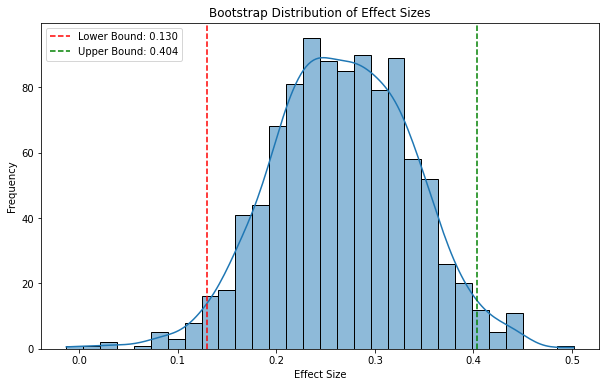

In [ ]:
# Function to calculate effect size
def calculate_effect_size(data1, data2):
    mean_diff = np.mean(data1) - np.mean(data2)
    pooled_std = np.sqrt((np.std(data1, ddof=1) ** 2 + np.std(data2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std

# Bootstrap method to calculate confidence intervals
def bootstrap_effect_size(data1, data2, num_bootstrap=1000, ci=95):
    bootstrapped_effect_sizes = []
    for _ in range(num_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        bootstrapped_effect_sizes.append(calculate_effect_size(sample1, sample2))
    
    lower_bound = np.percentile(bootstrapped_effect_sizes, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_effect_sizes, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound, bootstrapped_effect_sizes

# Calculate the 95% confidence interval for the effect size
lower_bound, upper_bound, bootstrapped_effect_sizes = bootstrap_effect_size(df_capstone_19_plus_no_pepper_male['AverageProfessorRating'], df_capstone_19_plus_no_pepper_female['AverageProfessorRating'])

print(f'95% Confidence Interval for the Effect Size: [{lower_bound}, {upper_bound}]')

# Plot the bootstrap distribution of effect sizes
plt.figure(figsize=(10, 6))
sns.histplot(bootstrapped_effect_sizes, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.3f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.3f}')
plt.title('Bootstrap Distribution of Effect Sizes')
plt.xlabel('Effect Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Effect size:  0.059835460116447824
95% Confidence Interval for the Effect Size: [0.04325231907084785, 0.07733076266242085]


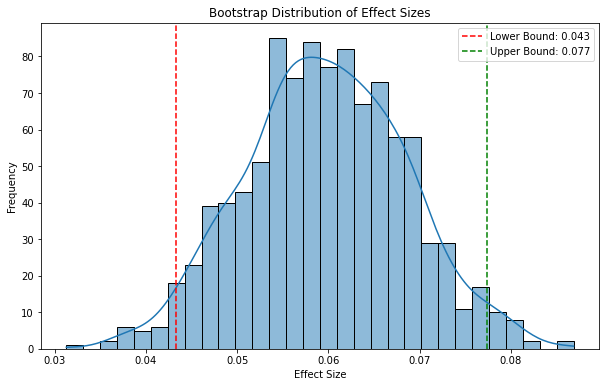

In [85]:
# Lets look at the effect size of male and female professors in general

def calculate_effect_size(data1, data2):
    mean_diff = np.mean(data1) - np.mean(data2)
    pooled_std = np.sqrt((np.std(data1, ddof=1) ** 2 + np.std(data2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std

# Bootstrap method to calculate confidence intervals
def bootstrap_effect_size(data1, data2, num_bootstrap=1000, ci=95):
    bootstrapped_effect_sizes = []
    for _ in range(num_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        bootstrapped_effect_sizes.append(calculate_effect_size(sample1, sample2))
    
    lower_bound = np.percentile(bootstrapped_effect_sizes, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_effect_sizes, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound, bootstrapped_effect_sizes

mean_diff_general = df_capstone[(df_capstone['HighConfMale'] == 1) & (df_capstone['HighConfFemale'] == 0)]['AverageProfessorRating'].mean() - df_capstone[(df_capstone['HighConfMale'] == 0) & (df_capstone['HighConfFemale'] == 1)]['AverageProfessorRating'].mean()

pooledd_std_general = np.sqrt((df_capstone[(df_capstone['HighConfMale'] == 1) & (df_capstone['HighConfFemale'] == 0)]['AverageProfessorRating'].std()**2 + df_capstone[(df_capstone['HighConfMale'] == 0) & (df_capstone['HighConfFemale'] == 1)]['AverageProfessorRating'].std()**2) / 2)

effect_size_general = mean_diff_general / pooledd_std_general

print('Effect size: ', effect_size_general)

# Plot the 95% confidence interval for the effect size
lower_bound, upper_bound, bootstrapped_effect_sizes = bootstrap_effect_size(df_capstone[(df_capstone['HighConfMale'] == 1) & (df_capstone['HighConfFemale'] == 0)]['AverageProfessorRating'], df_capstone[(df_capstone['HighConfMale'] == 0) & (df_capstone['HighConfFemale'] == 1)]['AverageProfessorRating'])

print(f'95% Confidence Interval for the Effect Size: [{lower_bound}, {upper_bound}]')

# Plot the bootstrap distribution of effect sizes
plt.figure(figsize=(10, 6))
sns.histplot(bootstrapped_effect_sizes, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.3f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.3f}')
plt.title('Bootstrap Distribution of Effect Sizes')
plt.xlabel('Effect Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Effect size:  0.08588032078677821
95% Confidence Interval for the Effect Size: [0.04273662307914158, 0.13557701172949385]


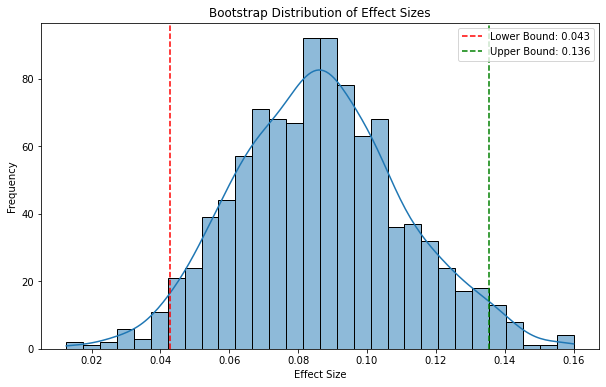

In [86]:
# Lets look at the effect size of male and female professors in general

mean_diff_general = df_capstone_greater_than_10_men['AverageProfessorRating'].mean() - df_capstone_greater_than_10_female['AverageProfessorRating'].mean()

pooledd_std_general = np.sqrt((df_capstone_greater_than_10_men['AverageProfessorRating'].std()**2 + df_capstone_greater_than_10_female['AverageProfessorRating'].std()**2) / 2)

effect_size_general = mean_diff_general / pooledd_std_general

print('Effect size: ', effect_size_general)

# Plot the 95% confidence interval for the effect size
lower_bound, upper_bound, bootstrapped_effect_sizes = bootstrap_effect_size(df_capstone_greater_than_10_men['AverageProfessorRating'], df_capstone_greater_than_10_female['AverageProfessorRating'])

print(f'95% Confidence Interval for the Effect Size: [{lower_bound}, {upper_bound}]')

# Plot the bootstrap distribution of effect sizes
plt.figure(figsize=(10, 6))
sns.histplot(bootstrapped_effect_sizes, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.3f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.3f}')
plt.title('Bootstrap Distribution of Effect Sizes')
plt.xlabel('Effect Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Power Analysis: Conducting a Power Analysis for the KS Test